# Zadaća 2
##### Rok za predaju: 10. ožujka, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs, make_circles
from sklearn import preprocessing
from sklearn.preprocessing import scale
from math import sqrt,inf

## Zadatak 1 (5)
Zadan vam je model perceptrona sa parametrima $\theta =[\theta_1 ,\theta_2]= [2.5, 3]$. <br>
Skicirajte (nacrtajte) klasifikacijsku hiperravninu (pravac) definiranu ovim parametrima. Klasificira li ispravno ovaj model sljedeće podatke
$$X= [(0,-0.8), (-1,0), (-0.5, -0.5), (0,1), (0.5,0.8)]$$
sa pripadnim oznakama klasa 
$$y = [-1,-1,-1,-1,1]. $$

$
\theta_1 = 2.5, \quad \theta_2 = 3\\
y_1 = -1\\
X_1 = (0, -0.8)\\
x_1 = 0, \quad x_2 = -0.8\\
sign(\theta_1x_1+\theta_2x_2) = sign(2.5*0 + 3 * (-0.8)) = sign(-2.4) = -1 = y_1\\
y_2 = -1\\
X_2 = (-1, 0)\\
x_1 = -1, \quad x_2 = 0\\
sign(\theta_1x_1+\theta_2x_2) = sign(2.5*(-1) + 3 * 0) = sign(-2.5) = -1 = y_2\\
y_3 = -1\\
X_3 = (-0.5, -0.5)\\
x_1 = -0.5, \quad x_2 = -0.5\\
sign(\theta_1x_1+\theta_2x_2) = sign(2.5*(-0.5) + 3 * (-0.5)) = sign(-2.75) = -1 = y_3\\
y_4 = -1\\
X_4 = (0, 1)\\
x_1 = 0, \quad x_2 = 1\\
sign(\theta_1x_1+\theta_2x_2) = sign(2.5*0 + 3 * 1) = sign(3) = 1 \neq y_4\\
y_5 = -1\\
X_4 = (0.5, 0.8)\\
x_1 = 0.5, \quad x_2 = 0.8\\
sign(\theta_1x_1+\theta_2x_2) = sign(2.5*0.5 + 3 * 0.8) = sign(3.65) = 1 = y_5\\
$


## Zadatak 2 (10)
Kao što smo na vježbama radili, pomoću perceptrona implementirajte logičke XNOR, NAND. 

___

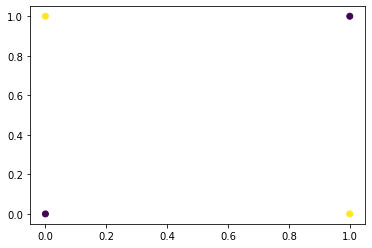

In [3]:
# Vaš kod
# XNOR
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([-1,1,1,-1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

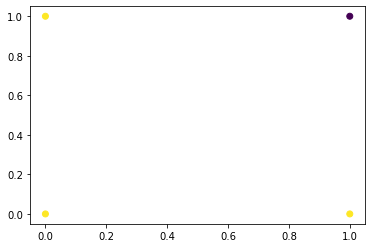

In [4]:
# NAND
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([1,1,1,-1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

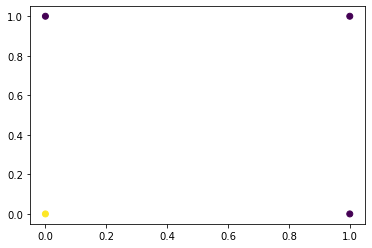

In [5]:
# NOR
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([1,-1,-1,-1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## Zadatak 3 (15+10)
---
Vaš zadatak će biti implementirati perceptron koji će rješavati problem klasifikacije podataka s obzirom na jednu od dvije klase $\{ 1, -1\}$.

Na predavanju je pokazan perceptron algoritam za podatke koji su linearno separabilni kroz ishodište. Drugim riječima, definirali smo da su podaci $\{ (x^{(i)}, y^{(i)}) : i=1,\cdots,m\}$ linearno separabilni kroz ishodište ako postoji $\theta = [\theta_1, \cdots, \theta_n]$ takav da je $y^{(i)} \theta ^T x^{(i)} > 0$, $\forall i = 1,\cdots, m$. 

U zadaći želimo ovaj koncept generalizirati tako da separabilnost ne bude nužno kroz ishodište. <br>
Tada možemo reći da će podaci  $\{ (x^{(i)}, y^{(i)}) : i=1,\cdots,m\}$ biti linearno separabilni ako postoji $\theta = [\theta_0, \theta_1, \cdots, \theta_n]$ takav da je $y^{(i)} \theta ^T x^{(i)} > 0$, $\forall i = 1,\cdots, m$, pri čemu je svaki podatak oblika $x^{(i)} = [1, x_1^{(i)}, \cdots, x_n^{(i)}]$.


1. Implementirajte algoritam perceptrona koji na ulazu ima  argumente: $X \in \mathbb{R}^{(m\times (n+1))} $ i $y \in \mathbb{R}^{(m\times 1)} $, gdje je $m$ ukupan broj ulaznih podataka, a $n$ broj varijabli ulaznog podatka. <br> Algoritam treba vratiti vektor parametera $\theta \in \mathbb{R}^{(n+1)\times 1}$ i broj $k$ koji predstavlja koliko je puta ažurirana vrijednost $\theta$. Kao što je pokazano na predavanju, algoritam treba ciklički prolaziti kroz podatke i prilagođavati parametre. 

2. Učitajte podatke koji su vam dani X_a.csv i y_a.csv te na njima pokrenite algoritam iz prethodnog zadatke. Ispište dobivenu vrijednost parametara $\theta$ i broj ažuriranja $k$. To ponovite na podacima X_b.csv i y_b.csv

_Dalje ćemo u zadacima govoriti paralelno za oba skupa podataka i uvesti oznake s indeksima $a$ tj. $b$ koje će se odnositi na podatke iz  X_a.csv tj. X_b.csv_


3. Izračunajte vrijednosti $\gamma_{geom}^a$ i  $\gamma_{geom}^b$ vašeg klasifikatora, tj. najmanju udaljenost podatka do hiperravnine određene formulom $\theta_a ^{T} x = 0$ odnosno hiperravnine $\theta_b ^{T} x = 0$ za podatke iz drugog skupa. 
4.  Vizualizirajte podatke $X_a$ i dobiveni dobiveni pravac $\theta_a x = 0$ te analogno podatke $X_b$ i pravac $\theta_b x = 0$. Na oba grafička prikaza treba biti naznačeno pripadanje podataka jednoj od dvije klase. 
5. Na temelju zadatka 3. i 4. interpretirajte koji je od ova dva problema teži za klasificirati. 
6. U analizi ovog algoritma, napravljena je pretpotstavka o tome kako su norme svih podataka ograničene s nekim brojem $R$. Izračunajte te brojeve $R$ za vaše skupove podataka. 

za X_a
theta: [ 0.         -6.59938418  5.7945654 ]
k: 28
za X_b
theta: [ 0.         -3.2544497   3.34146374]
k: 6
gama za X_a: 0.13854883509833746
gama za X_b: 0.3038939535748039
R za X_a: 0.7331315242157962
R za X_b: 0.7443851221753095


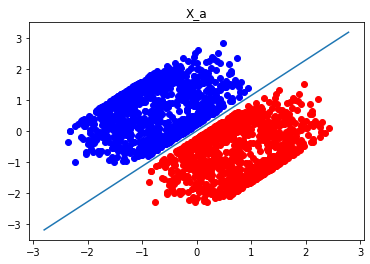

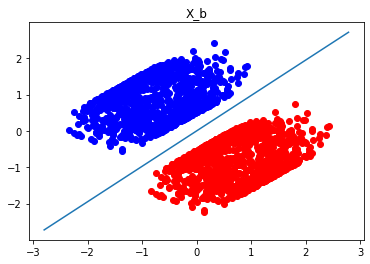

In [6]:
# Vaš kod
# 1.

def condition(x, y, theta):
    m  = y.shape[0]
    for i in range(m):
        if(y[i] * np.dot(theta,x[i]) <=0):
            return True
    return False

def perceptron(x, y):
    k = 0
    m  = y.shape[0]
    theta = np.zeros((1, x.shape[1]), float)
    while(condition(x,y,theta)):
        for i in range(m):
            if(1 >= np.dot(theta, x[i]) / y[i]):
                theta = theta + (y[i]*x[i])
                k += 1
    return (theta, k)

def ploting(x, theta):
    m = x.shape[0]
    for i in range(m):
        if x[i, 2] > (theta[0] + theta[1]*x[i,1]/(-theta[2])):
            plt.scatter(x[i,1], x[i,2],c='blue')
        else:
            plt.scatter(x[i,1], x[i,2],c='red')
    dom = np.arange(-2.8,2.8,0.01)
    plt.plot(dom, (theta[0] + theta [1]*dom)/(-theta[2]))

    
def gama(x, theta):
    dist = inf
    m = x.shape[0]
    for i in range(m):
        tmp_dist = abs(((theta[1]/theta[2]) * x[i][1]) + x[i][2] + (theta[0]/theta[2])) / sqrt((pow(theta[1],2) / pow(theta[2],2)) + 1)
        if (tmp_dist < dist):
            dist = tmp_dist
    return dist

def calcR(k, gama):
    return sqrt(k*pow(gama,2))

def visualise(x):
    m = x.shape[0]
    for i in range(m):
        plt.scatter(x[i,1], x[i,2], c='grey')
    return 
    
if __name__ == "__main__":
    X_a = pd.read_csv('./X_a.csv')
    y_a  = pd.read_csv('./y_a.csv')
    matrix = np.ones((y_a.shape[0], 1), float)
    tmp = scale(X_a)
    matrix = np.column_stack([matrix, tmp])
    y_a = scale(y_a)
    atheta, ak = perceptron(matrix, y_a)
    atheta = atheta[0]
    X_b = pd.read_csv('./X_b.csv')
    y_b = pd.read_csv('./y_b.csv')
    matrixb = np.ones((y_a.shape[0], 1), float)
    tmp = scale(X_b.to_numpy())
    matrixb = np.column_stack([matrixb, tmp])
    y_b = y_b.to_numpy()
    btheta, bk = perceptron(matrixb, y_b)
    btheta = btheta[0]
    
    # 2.
    print('za X_a\ntheta: {}\nk: {}\nza X_b\ntheta: {}\nk: {}'.format(atheta,ak,btheta,bk))
    
    # 3.
    gama_a = gama(matrix, atheta)
    gama_b = gama(matrixb, btheta)
    print('gama za X_a: {}\ngama za X_b: {}'.format(gama_a,gama_b))
    
    # 4.
    plt.figure(0)
    plt.title('X_a')
    ploting(matrix, atheta)
    plt.figure(1)
    plt.title('X_b')
    ploting(matrixb, btheta)
    
    # 5. Teži problem za klasificirati je X_a jer su podatci grupirani bliže i gama od X_a je manji od gama X_b
    
    # 6.
    R_a = calcR(ak, gama_a)
    R_b = calcR(bk, gama_b)
    print('R za X_a: {}\nR za X_b: {}'.format(R_a,R_b))

## Zadatak 4 (10)
U datotekama i su vam zadani podaci koje koje je potrebno klasificirati perceptron algoritmom. 
1. Učitajte podatke 2X_a, 2y_a vizualizirajte ih. 
2. Odredite kojom biste klasom funkcija mogli separirati ove podatke. Parametre funkcije iz te klase trebate pronaći koristeći perceptron algoritam koji ste implementirali. 
___

In [ ]:
# Vaš kod

def polarise_coordinates(x):
    m = x.shape[0]
    for i in range(m):
        x[i, 1] = sqrt(pow(x[i,1], 2) + pow(x[i, 2], 2))
        x[i, 2] = np.arctan((x[i, 2]/x[i,1]))
    return x

# a)
X_a2 = pd.read_csv('./2X_a.csv')
y_a2 = pd.read_csv('./2y_a.csv')
   
matrix2a = np.ones((y_a2.shape[0], 1), float)
tmp = scale(X_a2)
matrix2a = np.column_stack([matrix2a, tmp])
y_a2 = scale(y_a2)
plt.figure(4)
plt.title('2X_a')
visualise(matrix2a)

# b) 
x2apol = polarise_coordinates(matrix2a)
x2apol = scale(x2apol)
    
theta2a = perceptron(x2apol, y_a2)
theta2a = theta2a[0][0]
    
print('theta za 2X_a: {}'.format(theta2a))


theta za 2X_a: [ 0.         -5.29798853 -0.19669655]


## Zadatak 5 (10):
Nadogradite implementaciju perceptron algoritma tako da u svakoj iteraciji vizualizirate podatke i dobiveni pravac koji separira te podatke. <br>
Pokrenite algoritam na podacima koje ćete dobiti koristeći ugrađenu funkciju iz scikit-learn *make_blobs* sa sljedećim parametrima: <br>make_blobs(n_samples=500, n_features=2, centers=2, random_state=4).

Opišite dobiveni rezultat. 

In [ ]:
# Vaš kod
